<a href="https://colab.research.google.com/github/hwanys2/AI-math/blob/main/6.%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/6_1_%EC%98%81%ED%99%94%EC%B6%94%EC%B2%9C_%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고자료 : https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system 
  
영화추천 시스템을 3가지로 만들어 보겠습니다.  
1. Demographic Filtering (인구통계학적 필터링)
    * 일반적으로 사람들이 좋아하는 아이템의 추천
1. Content Based Filtering (컨텐츠 기반 필터링)
    * 자신이 즐겨보던 영화와 비슷한(장르, 감독, 배우, 분위기 등등) 영화를 추천
1. Collaborative Filtering (협업 필터링)
    * 자신과 비슷한 사람이 재밌게 본 영화를 추천해주는 방식


## 1. Demographic Filtering (인구통계학적 필터링)

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('http://teacher.pe.kr/wp-content/uploads/2022/10/tmdb_5000_credits.csv')
df2 = pd.read_csv('http://teacher.pe.kr/wp-content/uploads/2022/10/tmdb_5000_movies.csv')

In [2]:
# df1(credits)에 어떤 데이터가 있는지 확인해보겠습니다.
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# df2(movies)에 어떤 데이터가 있는지 확인해보겠습니다.
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
# 데이터 갯수 확인하기
df1.shape, df2.shape

((4803, 4), (4803, 20))

In [5]:
# 데이터 갯수가 동일 하니 하나의 데이터로 합쳐서 처리(id와 movie_id, title 정보가 있음)
# 각 title 이 동일한지 확인하기
df1['title'].equals(df2['title'])

True

In [6]:
# df1의 mivie_id 를 id로 변경
df1.columns = ['id', 'title', 'cast', 'crew']
df1.head(2)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [7]:
# title은 df2와 동일하니 title 열 제거
df1[['id', 'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [8]:
# 두 데이터 합쳐서 movie_df 로 정하기
movie_df = df2.merge(df1[['id', 'cast', 'crew']], on='id')
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### 영화 추천 알고리즘 
10명이 추천하여 평점 8점인 것고 500명이 추천하여 평점 8점인 것은 분명차이가 있습니다.  
평점과 평점 횟수를 적당히 알고리즘으로 만들 필요가 있습니다.


[Getting Started with a Movie Recommendation System](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system)에서 제시한 방법을 사용하겠습니다.  

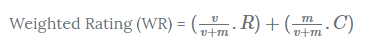

v는 영화에 대한 평가수입니다.  
m은 차트에 나열되는 데 필요한 최소 평가수입니다.  
R은 영화의 평균 등급입니다. 그리고  
C는 전체 보고서의 평균 평가수입니다.  
우리는 이미 v(vote_count)와 R(vote_average)을 가지고 있고 C는 다음과 같이 계산할 수 있습니다

In [9]:
# C 값구하기
C= movie_df['vote_average'].mean()
C

6.092171559442016

In [10]:
# m값정하기
# vote_count 기준으로 상위 10% 영화만 대상으로 삼기
m = movie_df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
# 평점갯수가 1838개 이상인 데이터만 모으기
q_movies = movie_df.copy().loc[movie_df['vote_count'] >= m]
q_movies.shape

(481, 22)

In [12]:
# 영화추천 공식 만들기
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
# 공식적용하여 score 계산하기
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [14]:
# 스코어기준 내림차순으로 정렬하기
q_movies = q_movies.sort_values('score', ascending=False)

# 상위 10개만 출력하기
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## Content Based Filtering (컨텐츠 기반 필터링)

### 줄거리 기반 추천

In [15]:
# 영화에 overview의 내용을 분석하여 비슷한 영화를 추천
movie_df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

### 텍스트 처리의 이해
문장1 : I am a boy

문장2 : I am a girl

I(2), am(2), a(2), boy(1), girl(1)

        
        
 I    am   a   boy    girl  
 문장1  1    1    1    1      0   (1,1,1,1,0)
 (I am a boy)
 
 문장2  1    1    1    0      1   (1,1,1,0,1)
 (I am a girl)
 
 피처 벡터화.
 
 
 문서 100개
 모든 문서에서 나온 단어 10,000 개
 100 * 10,000 = 100만
 
        단어1, 단어2, 단어3, 단어4, .... 단어 10000
문서1      1      1       3    0    
문서2  
문서3  
..  
문서100  

### TF-idf 방법

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 단어의 가중치를 구해 중요 단어를 찾는 방법입니다.


(1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.

(2) df(t) : 특정 단어 t가 등장한 문서의 수.

(3) idf(d, t) : df(t)에 반비례하는 수.

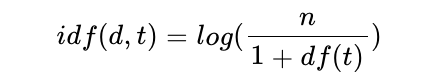

교재에서는 n/df 을 사용하지만 보통 프로그래밍은 많은 데이터를 다루기에 로그를 사용합니다.

In [16]:
#TfIdfVectorizer 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf 객체 생성(stop_words를 영어로 지정함으로써 a, the, of 등 의미없는 단어들을 자동으로 제외함.)
tfidf = TfidfVectorizer(stop_words='english')

#비어있는 데이터 채우는 전처리 과정
movie_df['overview'] = movie_df['overview'].fillna('')

#tf_idf 행렬 만들기
tfidf_matrix = tfidf.fit_transform(movie_df['overview'])

#tf_idf 행렬 크기(문장의 갯수 * 단어의 총갯수)
tfidf_matrix.shape

(4803, 20978)

## 유사도 구하기
[코사인 유사도](https://ko.wikipedia.org/wiki/%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84)


In [17]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

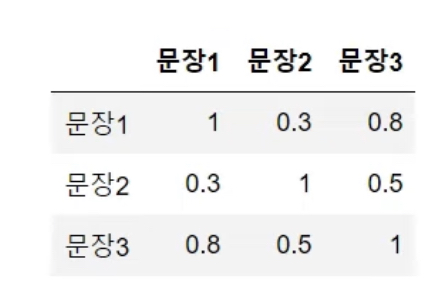

In [18]:
#제목을 가져오기 위해 제목과 id 값만 가져옴
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [19]:
# 다음과 같이 사용하기 위함
indices['The Dark Knight Rises']

3

In [20]:
movie_df.iloc[[3]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [21]:
# 영화 제목을 입력받으면 코사인 유사도를 통해서 가장 높은 유사도를 가지는 상위 10개 영화 목록 반환 함수
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [22]:
# 다크나이트와 유사한 영화 추천받기
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [23]:
# 어벤져스와 유사한 영화 추천받기
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

### 다양한 요소 기반 추천(장르, 감독, 키워드 등)

In [24]:
# 데이터 전처리 문자열을 자료형으로 변환
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movie_df[feature] = movie_df[feature].apply(literal_eval)

In [25]:
# 감독이름 알려주는 함수 만들기
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [26]:
# 감독열을 새로 만들기
movie_df['director'] = movie_df['crew'].apply(get_director)
movie_df['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [27]:
# 감독 열 생긴 걸 확인할 수 있음.
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski


In [28]:
# 배우, 키워드, 장르 정보 가져오기(처음 세가지만 가져오기)
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

features = ['cast', 'keywords', 'genres']
for feature in features:
    movie_df[feature] = movie_df[feature].apply(get_list)

movie_df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [29]:
# 각 정보들의 전처리(소문자로 모두 바꾸고 공백제거)
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# 적용
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movie_df[feature] = movie_df[feature].apply(clean_data)
movie_df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [30]:
# 위 정보들을 하나의 문장으로 만듭니다.
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movie_df['soup'] = movie_df.apply(create_soup, axis=1)
movie_df['soup'].head(3)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
Name: soup, dtype: object

In [31]:
# 이 문장을 overview를 통해 분석한 것과 같이 코사인 유사도를 구하여 유사한 영화를 찾도록 만듭니다.
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movie_df['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
movie_df = movie_df.reset_index()
indices = pd.Series(movie_df.index, index=movie_df['title'])

In [32]:
# 영화 추천 받기
get_recommendations('The Dark Knight Rises', cosine_sim2)


65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [33]:
# 줄거리를 바탕으로 한 추천과 위의 추천 결과를 비교 해보세요.
get_recommendations('The Dark Knight Rises', cosine_sim)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

### Collaborative Filtering (협업 필터링)

In [1]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633979 sha256=54de0277a832515c48e7b7295828d79bee6513fcf5f1ba15813aad35957fb7f1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [3]:
ratings = pd.read_csv('http://teacher.pe.kr/wp-content/uploads/2022/10/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# rating 범위 확인하기 위해 최소값 확인하기
ratings['rating'].min()

0.5

In [5]:
# rating 범위 확인하기 위해 최댓값 확인하기
ratings['rating'].max()

5.0

In [6]:
# 자료 읽어오기
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader=reader)
data

In [7]:
#특이값 분해
svd = SVD(random_state=0)
# 교차검증 cv=5는 5개로 나누어 training, test 셋을 나누어 검증법
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8982  0.8957  0.9017  0.8900  0.9016  0.8974  0.0043  
MAE (testset)     0.6925  0.6888  0.6922  0.6856  0.6934  0.6905  0.0029  
Fit time          6.87    11.09   5.18    9.23    6.83    7.84    2.08    
Test time         0.33    0.24    0.41    0.33    0.23    0.31    0.07    


{'test_rmse': array([0.89816993, 0.89566367, 0.90172924, 0.89004321, 0.9016051 ]),
 'test_mae': array([0.69249378, 0.68876242, 0.69215019, 0.68560427, 0.69339094]),
 'fit_time': (6.870341539382935,
  11.090692281723022,
  5.176889896392822,
  9.229477167129517,
  6.831594228744507),
 'test_time': (0.33194565773010254,
  0.23980069160461426,
  0.40725183486938477,
  0.32552433013916016,
  0.23050332069396973)}

In [8]:
# 데이터 학습시키기
trainset = data.build_full_trainset()
svd.fit(trainset)

In [9]:
# id가 1인 사람의 데이터
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [13]:
# 302 id의 영화를 어떻게 평가할 지 예측 해보기
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.7142061734434044, details={'was_impossible': False})

In [15]:
# 실제 평가값과 예측값 확인해보기
svd.predict(1, 3671)
# 실제로는 3점을 평가했지만 예측으로 나오는 값과 비교해보기

Prediction(uid=1, iid=3671, r_ui=None, est=3.05392358530159, details={'was_impossible': False})